# Batch Segmentation Workflow

This notebook does batch processing for 3D nuclei image segmentation

In [18]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from napari_skimage_regionprops._regionprops import regionprops_table
import os
import pandas as pd

In [19]:
def my_segmentation(file_path, output_path=None):
    """Apply custom 3D nuclei segmentation and save properties"""
    
    if output_path==None:
        output_path = os.path.split(file_path)[0]
    file_name = os.path.splitext(os.path.split(file_path)[1])[0]
    
    # Read image
    image0_n = imread(file_path)
    # Apply voronoi otsu labeling from nsbatwm
    image1_V = nsbatwm.voronoi_otsu_labeling(image0_n, 9.0, 3.0)
    # Remove labels touching edges
    image2_R = nsbatwm.remove_labels_on_edges(image1_V)
    # Measure properties
    df = pd.DataFrame(regionprops_table(image0_n, image2_R, shape = True))
    # Save propeties to disk
    df.to_csv(os.path.join(output_path, 'table_' + file_name + '.csv'))
    
    return image2_R

In [20]:
data_path = 'data'

# Run function on example image 

In [21]:
example_image_path = os.path.join(data_path, 'nuclei3d.tif')
example_image_path

'data\\nuclei3d.tif'

Read example image.

In [22]:
image0_n = imread(example_image_path)

Apply function to example image and display results in napari.

C:\Miniconda\envs\devbio-napari-env\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


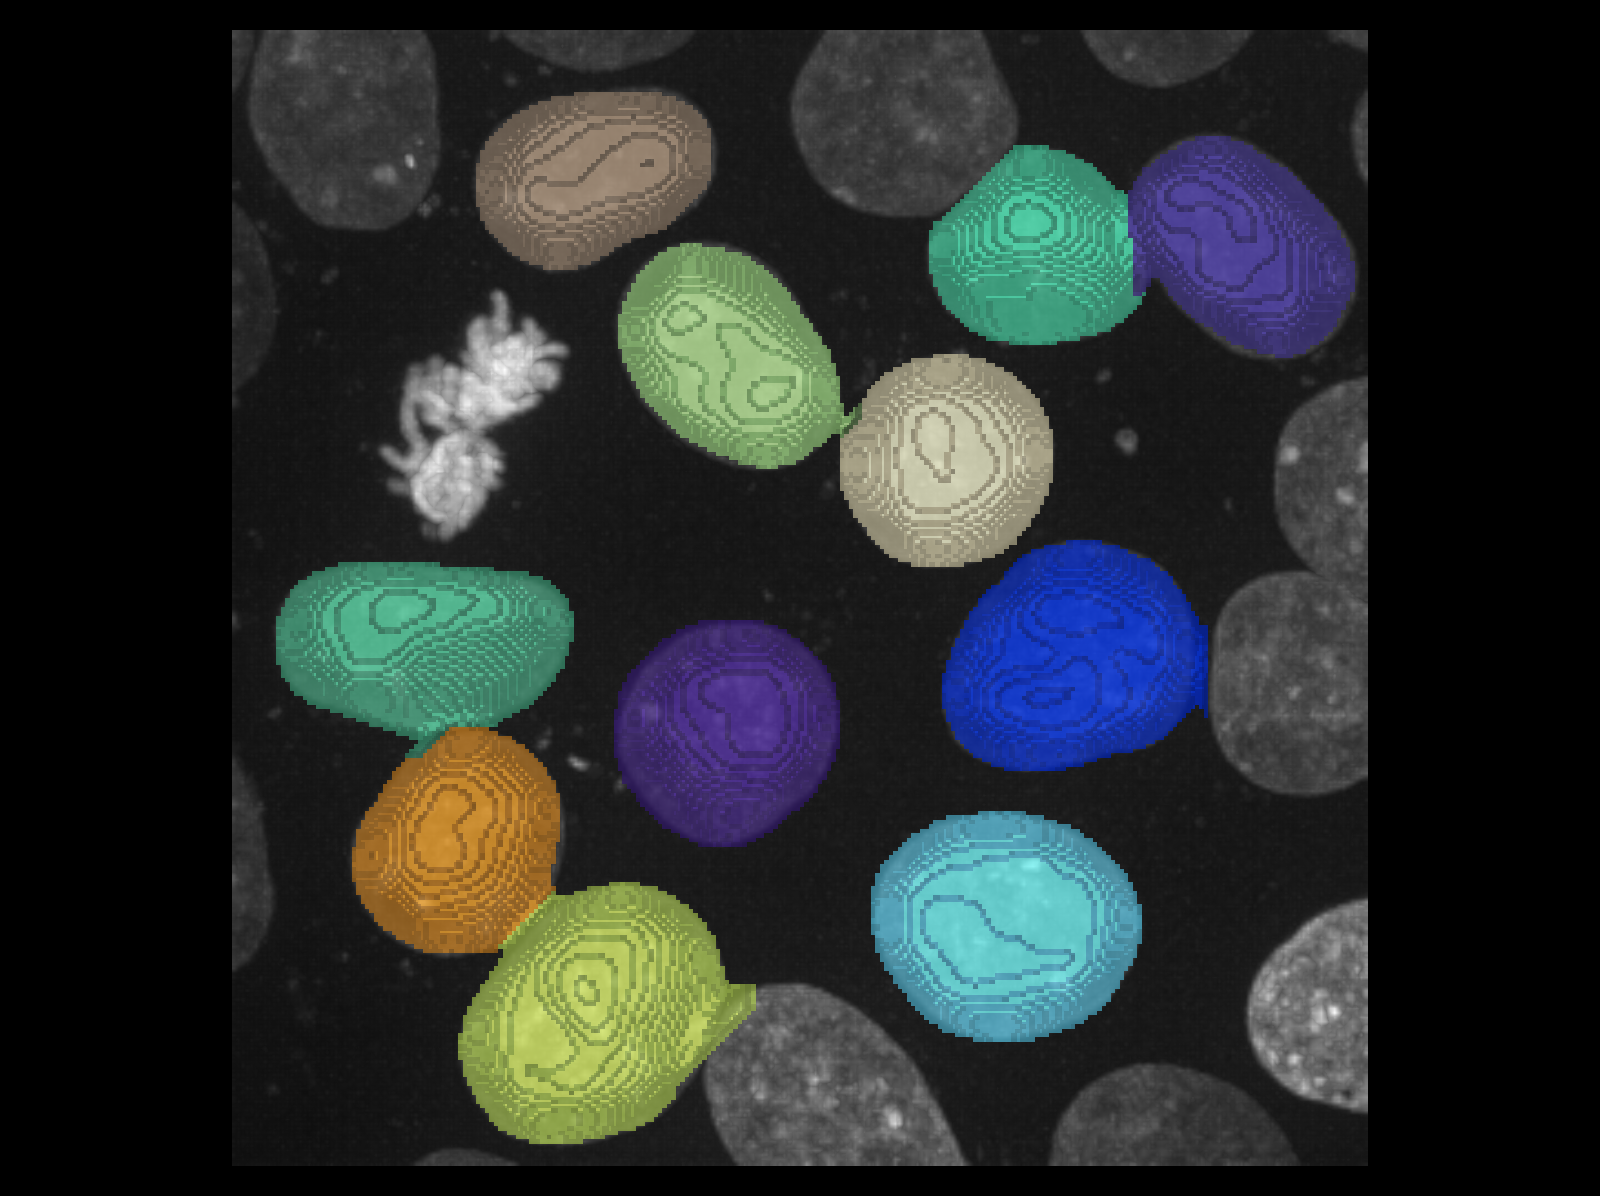

In [23]:
viewer = napari.Viewer()
viewer.add_image(image0_n)

label_image = my_segmentation(example_image_path)

viewer.add_labels(label_image)

viewer.dims.ndisplay = 3

nbscreenshot(viewer, canvas_only = True)

# Batch processing

In [24]:
for file_name in os.listdir(data_path):
    if file_name.endswith('.tif'):
        file_path = os.path.join(data_path, file_name)
        label_image = my_segmentation(file_path)